In [94]:
import pandas as pd
import numpy as np

In [95]:
submission=pd.read_csv('submission.csv')

In [96]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [97]:
test.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,42,56.10,2386.85,Male,0,Yes,No,Yes,Yes,DSL,Yes,No,No,No,No,No,One year,No,Credit card (automatic)
1,29,98.50,3004.15,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
2,9,76.25,684.85,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
3,67,74.00,4868.4,Female,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic)
4,71,20.10,1389.6,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic)


In [98]:
for i in list(train):
    print(train[i].value_counts())

1     457
72    284
2     165
3     162
4     136
     ... 
57     39
39     35
36     34
44     34
0       9
Name: ClientPeriod, Length: 73, dtype: int64
20.05     46
19.65     35
19.95     34
20.00     33
19.80     32
          ..
51.60      1
52.30      1
114.75     1
58.70      1
39.20      1
Name: MonthlySpending, Length: 1468, dtype: int64
           9
20.2       9
19.75      8
20.05      6
19.65      6
          ..
2354.8     1
784.45     1
7690.9     1
2448.75    1
8424.9     1
Name: TotalSpent, Length: 4978, dtype: int64
Male      2655
Female    2627
Name: Sex, dtype: int64
0    4440
1     842
Name: IsSeniorCitizen, dtype: int64
No     2705
Yes    2577
Name: HasPartner, dtype: int64
No     3676
Yes    1606
Name: HasChild, dtype: int64
Yes    4761
No      521
Name: HasPhoneService, dtype: int64
No                  2511
Yes                 2250
No phone service     521
Name: HasMultiplePhoneNumbers, dtype: int64
Fiber optic    2341
DSL            1800
No             1141
Name: H

In [99]:
import xgboost

In [148]:
from pandas import read_csv
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib
from matplotlib import pyplot

In [101]:
Xtrain=train.drop(['Churn'],1)
Xtrain['is_test'] = False
test['is_test'] = True
X = pd.concat([Xtrain, test], axis=0)
X.index = range(len(X))
X.columns = X.columns.str.lower()

In [102]:
y=train.Churn

In [103]:
X.head()

,clientperiod,monthlyspending,totalspent,sex,isseniorcitizen,haspartner,haschild,hasphoneservice,hasmultiplephonenumbers,hasinternetservice,hasonlinesecurityservice,hasonlinebackup,hasdeviceprotection,hastechsupportaccess,hasonlinetv,hasmoviesubscription,hascontractphone,isbillingpaperless,paymentmethod,is_test
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,False
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),False
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,False
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,False
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),False


In [104]:
X.totalspent= pd.to_numeric(X.totalspent, errors='coerce')

In [105]:
list(X)

['clientperiod',
 'monthlyspending',
 'totalspent',
 'sex',
 'isseniorcitizen',
 'haspartner',
 'haschild',
 'hasphoneservice',
 'hasmultiplephonenumbers',
 'hasinternetservice',
 'hasonlinesecurityservice',
 'hasonlinebackup',
 'hasdeviceprotection',
 'hastechsupportaccess',
 'hasonlinetv',
 'hasmoviesubscription',
 'hascontractphone',
 'isbillingpaperless',
 'paymentmethod',
 'is_test']

In [106]:
df_dummies = pd.get_dummies(X, columns=['sex', 'isseniorcitizen','haspartner','haschild','hasphoneservice',
 'hasmultiplephonenumbers',
 'hasinternetservice',
 'hasonlinesecurityservice',
 'hasonlinebackup',
 'hasdeviceprotection',
 'hastechsupportaccess',
 'hasonlinetv',
 'hasmoviesubscription',
 'hascontractphone',
 'isbillingpaperless',
 'paymentmethod'])

In [107]:
list(df_dummies) 

['clientperiod',
 'monthlyspending',
 'totalspent',
 'is_test',
 'sex_Female',
 'sex_Male',
 'isseniorcitizen_0',
 'isseniorcitizen_1',
 'haspartner_No',
 'haspartner_Yes',
 'haschild_No',
 'haschild_Yes',
 'hasphoneservice_No',
 'hasphoneservice_Yes',
 'hasmultiplephonenumbers_No',
 'hasmultiplephonenumbers_No phone service',
 'hasmultiplephonenumbers_Yes',
 'hasinternetservice_DSL',
 'hasinternetservice_Fiber optic',
 'hasinternetservice_No',
 'hasonlinesecurityservice_No',
 'hasonlinesecurityservice_No internet service',
 'hasonlinesecurityservice_Yes',
 'hasonlinebackup_No',
 'hasonlinebackup_No internet service',
 'hasonlinebackup_Yes',
 'hasdeviceprotection_No',
 'hasdeviceprotection_No internet service',
 'hasdeviceprotection_Yes',
 'hastechsupportaccess_No',
 'hastechsupportaccess_No internet service',
 'hastechsupportaccess_Yes',
 'hasonlinetv_No',
 'hasonlinetv_No internet service',
 'hasonlinetv_Yes',
 'hasmoviesubscription_No',
 'hasmoviesubscription_No internet service',
 

In [108]:
df_dummies.drop(["sex_Female", "isseniorcitizen_0", "haschild_No", "haschild_No", "hasphoneservice_No",'isbillingpaperless_No'], axis=1, inplace=True)

In [109]:
df_dummies.head()

,clientperiod,monthlyspending,totalspent,is_test,sex_Male,isseniorcitizen_1,haspartner_No,haspartner_Yes,haschild_Yes,hasphoneservice_Yes,...,hasmoviesubscription_No internet service,hasmoviesubscription_Yes,hascontractphone_Month-to-month,hascontractphone_One year,hascontractphone_Two year,isbillingpaperless_Yes,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,55,19.50,1026.35,False,1,0,0,1,1,1,...,1,0,0,1,0,0,0,0,0,1
1,72,25.85,1872.20,False,1,0,0,1,0,1,...,1,0,0,0,1,0,0,1,0,0
2,1,75.90,75.90,False,1,0,1,0,0,1,...,0,0,1,0,0,1,0,0,1,0
3,32,79.30,2570.00,False,0,1,0,1,0,1,...,0,0,1,0,0,0,0,0,0,1
4,60,115.25,6758.45,False,0,0,0,1,1,1,...,0,1,0,0,1,0,0,1,0,0


In [110]:
Xtrain = df_dummies[df_dummies.is_test==0].drop('is_test', axis=1)
Xtest = df_dummies[df_dummies.is_test==1].drop('is_test', axis=1)

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xtrain, y, test_size=0.33, random_state=42)

In [113]:
model = XGBClassifier()
n_estimators = range(10, 100, 10)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="roc_auc", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.850308 using {'n_estimators': 70}


In [123]:
params = {'n_estimators': 50,
          'learning_rate': 0.03,
          'max_depth': 5,
          'min_child_weight': 1,
          'subsample': 0.8,
          'colsample_bytree': 0.8,
          'n_jobs': -1}
clf_xgb = XGBClassifier(**params)

clf_xgb.fit(X_train, y_train, eval_metric='auc', eval_set=[[X_train, y_train], [X_test, y_test]])

best_params = params

[0]	validation_0-auc:0.854993	validation_1-auc:0.812725
[1]	validation_0-auc:0.861573	validation_1-auc:0.815777
[2]	validation_0-auc:0.86484	validation_1-auc:0.819359
[3]	validation_0-auc:0.866373	validation_1-auc:0.822718
[4]	validation_0-auc:0.869581	validation_1-auc:0.825339
[5]	validation_0-auc:0.870795	validation_1-auc:0.82753
[6]	validation_0-auc:0.871326	validation_1-auc:0.82949
[7]	validation_0-auc:0.872074	validation_1-auc:0.82927
[8]	validation_0-auc:0.872333	validation_1-auc:0.829477
[9]	validation_0-auc:0.873101	validation_1-auc:0.829931
[10]	validation_0-auc:0.873626	validation_1-auc:0.829757
[11]	validation_0-auc:0.873872	validation_1-auc:0.830292
[12]	validation_0-auc:0.875009	validation_1-auc:0.83141
[13]	validation_0-auc:0.875741	validation_1-auc:0.831406
[14]	validation_0-auc:0.876141	validation_1-auc:0.831303
[15]	validation_0-auc:0.876264	validation_1-auc:0.831815
[16]	validation_0-auc:0.876488	validation_1-auc:0.832203
[17]	validation_0-auc:0.87734	validation_1-auc

In [124]:
def find_params(clf, param_grid):
    clf = GridSearchCV(clf, param_grid, scoring='roc_auc', cv=[(np.arange(len(X_train)),
                                                               np.arange(len(X_test)) + len(X_train))],
                  verbose=3)

    clf.fit(pd.concat([X_train, X_test]).values, pd.concat([y_train, y_test]).values)
    best_params = clf.best_estimator_.get_params()
    print('Best test ROC AUC: ', clf.best_score_)
    print('Best params: ', best_params)
    return best_params

In [126]:
from sklearn.model_selection import GridSearchCV

clf_xgb = XGBClassifier(**best_params)

param_grid = {
    'max_depth': [3,4, 5,6,7,8,9, 10],
    'min_child_weight': [5,10,15, 20, 50]#[1, 5, 10]
}

best_params = find_params(clf_xgb, param_grid)

Fitting 1 folds for each of 40 candidates, totalling 40 fits
[CV] max_depth=3, min_child_weight=5 .................................
[CV] ..... max_depth=3, min_child_weight=5, score=0.830, total=   0.2s
[CV] max_depth=3, min_child_weight=10 ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .... max_depth=3, min_child_weight=10, score=0.830, total=   0.2s
[CV] max_depth=3, min_child_weight=15 ................................
[CV] .... max_depth=3, min_child_weight=15, score=0.830, total=   0.2s
[CV] max_depth=3, min_child_weight=20 ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] .... max_depth=3, min_child_weight=20, score=0.830, total=   0.2s
[CV] max_depth=3, min_child_weight=100 ...............................
[CV] ... max_depth=3, min_child_weight=100, score=0.823, total=   0.1s
[CV] max_depth=4, min_child_weight=5 .................................
[CV] ..... max_depth=4, min_child_weight=5, score=0.833, total=   0.2s
[CV] max_depth=4, min_child_weight=10 ................................
[CV] .... max_depth=4, min_child_weight=10, score=0.833, total=   0.2s
[CV] max_depth=4, min_child_weight=15 ................................
[CV] .... max_depth=4, min_child_weight=15, score=0.833, total=   0.2s
[CV] max_depth=4, min_child_weight=20 ................................
[CV] .... max_depth=4, min_child_weight=20, score=0.832, total=   0.2s
[CV] max_depth=4, min_child_weight=100 ...............................
[CV] ... max_depth=4, min_child_weight=100, score=0.823, total=   0.2s
[CV] max_depth=5, min_child_weight=5 .................................
[CV] .

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   10.0s finished


Best test ROC AUC:  0.8334356010544939
Best params:  {'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.03, 'max_delta_step': 0, 'max_depth': 5, 'min_child_weight': 15, 'missing': None, 'n_estimators': 50, 'n_jobs': -1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 0.8, 'verbosity': 1}


In [127]:
clf_xgb = XGBClassifier(**best_params)

param_grid = {
    'gamma': np.linspace(0, 0.5, 5)
}

best_params = find_params(clf_xgb, param_grid)

Fitting 1 folds for each of 5 candidates, totalling 5 fits
[CV] gamma=0.0 .......................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........................... gamma=0.0, score=0.833, total=   0.2s
[CV] gamma=0.125 .....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ......................... gamma=0.125, score=0.834, total=   0.3s
[CV] gamma=0.25 ......................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV] .......................... gamma=0.25, score=0.833, total=   0.2s
[CV] gamma=0.375 .....................................................
[CV] ......................... gamma=0.375, score=0.834, total=   0.2s
[CV] gamma=0.5 .......................................................
[CV] ........................... gamma=0.5, score=0.834, total=   0.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.1s finished


Best test ROC AUC:  0.8337957232862727
Best params:  {'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.8, 'gamma': 0.5, 'learning_rate': 0.03, 'max_delta_step': 0, 'max_depth': 5, 'min_child_weight': 15, 'missing': None, 'n_estimators': 50, 'n_jobs': -1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 0.8, 'verbosity': 1}


In [128]:
clf_xgb = XGBClassifier(**best_params)

param_grid = {
    'subsample': np.linspace(0.5, 1, 6),
    'colsample_bytree': np.linspace(0.5, 1, 6)
}

best_params = find_params(clf_xgb, param_grid)

Fitting 1 folds for each of 36 candidates, totalling 36 fits
[CV] colsample_bytree=0.5, subsample=0.5 .............................
[CV] . colsample_bytree=0.5, subsample=0.5, score=0.835, total=   0.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] colsample_bytree=0.5, subsample=0.6 .............................
[CV] . colsample_bytree=0.5, subsample=0.6, score=0.835, total=   0.2s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] colsample_bytree=0.5, subsample=0.7 .............................
[CV] . colsample_bytree=0.5, subsample=0.7, score=0.835, total=   0.2s
[CV] colsample_bytree=0.5, subsample=0.8 .............................
[CV] . colsample_bytree=0.5, subsample=0.8, score=0.835, total=   0.2s
[CV] colsample_bytree=0.5, subsample=0.9 .............................
[CV] . colsample_bytree=0.5, subsample=0.9, score=0.835, total=   0.2s
[CV] colsample_bytree=0.5, subsample=1.0 .............................
[CV] . colsample_bytree=0.5, subsample=1.0, score=0.834, total=   0.2s
[CV] colsample_bytree=0.6, subsample=0.5 .............................
[CV] . colsample_bytree=0.6, subsample=0.5, score=0.834, total=   0.2s
[CV] colsample_bytree=0.6, subsample=0.6 .............................
[CV] . colsample_bytree=0.6, subsample=0.6, score=0.834, total=   0.2s
[CV] colsample_bytree=0.6, subsample=0.7 .............................
[CV] . colsample_bytree=0.6, subsample=0.7, score=0.835, total=   0.2s
[CV] c

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    8.2s finished


Best test ROC AUC:  0.8354363772402751
Best params:  {'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.5, 'gamma': 0.5, 'learning_rate': 0.03, 'max_delta_step': 0, 'max_depth': 5, 'min_child_weight': 15, 'missing': None, 'n_estimators': 50, 'n_jobs': -1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 0.7, 'verbosity': 1}


In [130]:
clf_xgb = XGBClassifier(**best_params)

param_grid = {
    'reg_alpha': [0, 0.0001, 0.001, 0.1, 1],
    'reg_lambda': [0, 0.0001, 0.001, 0.1, 1]
}

best_params = find_params(clf_xgb, param_grid)

Fitting 1 folds for each of 25 candidates, totalling 25 fits
[CV] reg_alpha=0, reg_lambda=0 .......................................
[CV] ........... reg_alpha=0, reg_lambda=0, score=0.836, total=   0.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] reg_alpha=0, reg_lambda=0.0001 ..................................
[CV] ...... reg_alpha=0, reg_lambda=0.0001, score=0.836, total=   0.2s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] reg_alpha=0, reg_lambda=0.001 ...................................
[CV] ....... reg_alpha=0, reg_lambda=0.001, score=0.836, total=   0.2s
[CV] reg_alpha=0, reg_lambda=0.1 .....................................
[CV] ......... reg_alpha=0, reg_lambda=0.1, score=0.836, total=   0.2s
[CV] reg_alpha=0, reg_lambda=1 .......................................
[CV] ........... reg_alpha=0, reg_lambda=1, score=0.835, total=   0.2s
[CV] reg_alpha=0.0001, reg_lambda=0 ..................................
[CV] ...... reg_alpha=0.0001, reg_lambda=0, score=0.836, total=   0.2s
[CV] reg_alpha=0.0001, reg_lambda=0.0001 .............................
[CV] . reg_alpha=0.0001, reg_lambda=0.0001, score=0.836, total=   0.2s
[CV] reg_alpha=0.0001, reg_lambda=0.001 ..............................
[CV] .. reg_alpha=0.0001, reg_lambda=0.001, score=0.836, total=   0.2s
[CV] reg_alpha=0.0001, reg_lambda=0.1 ................................
[CV] .... reg_alpha=0.0001, reg_lambda=0.1, score=0.836, total=   0.2s
[CV] r

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    5.0s finished


Best test ROC AUC:  0.835850692623438
Best params:  {'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.5, 'gamma': 0.5, 'learning_rate': 0.03, 'max_delta_step': 0, 'max_depth': 5, 'min_child_weight': 15, 'missing': None, 'n_estimators': 50, 'n_jobs': -1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 0, 'reg_alpha': 0.1, 'reg_lambda': 0.001, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 0.7, 'verbosity': 1}


In [156]:
best_params['learning_rate'] = 0.01
best_params['n_estimators'] = 250

clf_xgb = XGBClassifier(**best_params)

clf_xgb.fit(X_train, y_train, eval_metric='auc', eval_set=[[X_train, y_train], [X_test, y_test]])

[0]	validation_0-auc:0.831046	validation_1-auc:0.808846
[1]	validation_0-auc:0.854345	validation_1-auc:0.828971
[2]	validation_0-auc:0.856293	validation_1-auc:0.82917
[3]	validation_0-auc:0.85765	validation_1-auc:0.829623
[4]	validation_0-auc:0.857849	validation_1-auc:0.831398
[5]	validation_0-auc:0.859229	validation_1-auc:0.832637
[6]	validation_0-auc:0.859908	validation_1-auc:0.832469
[7]	validation_0-auc:0.861267	validation_1-auc:0.833691
[8]	validation_0-auc:0.861657	validation_1-auc:0.834944
[9]	validation_0-auc:0.862532	validation_1-auc:0.834753
[10]	validation_0-auc:0.862551	validation_1-auc:0.833599
[11]	validation_0-auc:0.862722	validation_1-auc:0.833641
[12]	validation_0-auc:0.863489	validation_1-auc:0.834165
[13]	validation_0-auc:0.86396	validation_1-auc:0.833741
[14]	validation_0-auc:0.864538	validation_1-auc:0.83412
[15]	validation_0-auc:0.864562	validation_1-auc:0.834492
[16]	validation_0-auc:0.864939	validation_1-auc:0.833832
[17]	validation_0-auc:0.864789	validation_1-a

[144]	validation_0-auc:0.872376	validation_1-auc:0.834686
[145]	validation_0-auc:0.87233	validation_1-auc:0.834693
[146]	validation_0-auc:0.872341	validation_1-auc:0.834753
[147]	validation_0-auc:0.872351	validation_1-auc:0.834726
[148]	validation_0-auc:0.872336	validation_1-auc:0.834687
[149]	validation_0-auc:0.872424	validation_1-auc:0.834703
[150]	validation_0-auc:0.872448	validation_1-auc:0.83475
[151]	validation_0-auc:0.872475	validation_1-auc:0.834764
[152]	validation_0-auc:0.872623	validation_1-auc:0.83489
[153]	validation_0-auc:0.872685	validation_1-auc:0.834855
[154]	validation_0-auc:0.87268	validation_1-auc:0.834866
[155]	validation_0-auc:0.872762	validation_1-auc:0.834915
[156]	validation_0-auc:0.872782	validation_1-auc:0.834911
[157]	validation_0-auc:0.872845	validation_1-auc:0.834934
[158]	validation_0-auc:0.872868	validation_1-auc:0.834936
[159]	validation_0-auc:0.872897	validation_1-auc:0.835019
[160]	validation_0-auc:0.872899	validation_1-auc:0.835032
[161]	validation_0

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.5,
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=15, missing=None, n_estimators=250, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.1, reg_lambda=0.001, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.7, verbosity=1)

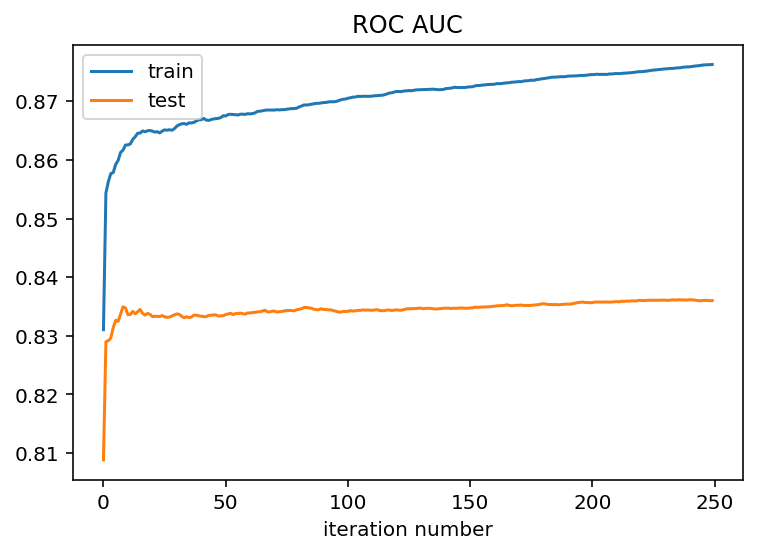

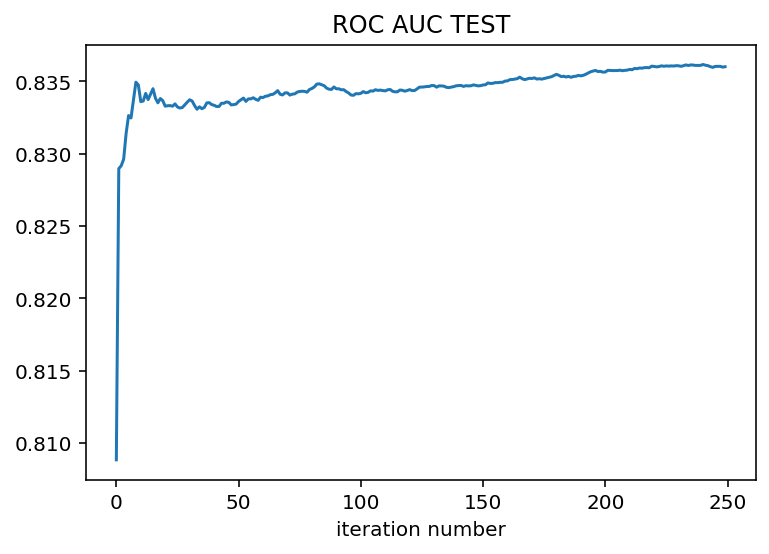

In [157]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
def save_online_metric(clf):
    return pd.DataFrame({'train': clf.evals_result()['validation_0']['auc'],
                         'test': clf.evals_result()['validation_1']['auc']})
res = save_online_metric(clf_xgb)
res.plot(title='ROC AUC')
plt.xlabel('iteration number')
plt.figure()
res.test.plot(title='ROC AUC TEST')
plt.xlabel('iteration number')
plt.show()

In [167]:
clf_xgb.fit(Xtrain, y, eval_metric='auc')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.5,
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=15, missing=None, n_estimators=250, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.1, reg_lambda=0.001, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.7, verbosity=1)

In [168]:
predict = clf_xgb.predict_proba(Xtest)

In [175]:
result = pd.DataFrame(data=predict, index=test.index, columns=["noChurn", "Churn"])

In [179]:
result.index.name = 'Id'

In [181]:
result.Churn.to_csv('predictions.csv')